# Analyze the home price by regression

### 1) Select the feature quantity for practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', 150) # columns

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
columns_train = ["GrLivArea", "YearBuilt", "SalePrice"]
df_anls = df_train.loc[:, columns_train]
df_anls.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [5]:
df_anls.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [6]:
df_anls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [7]:
df_anls.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


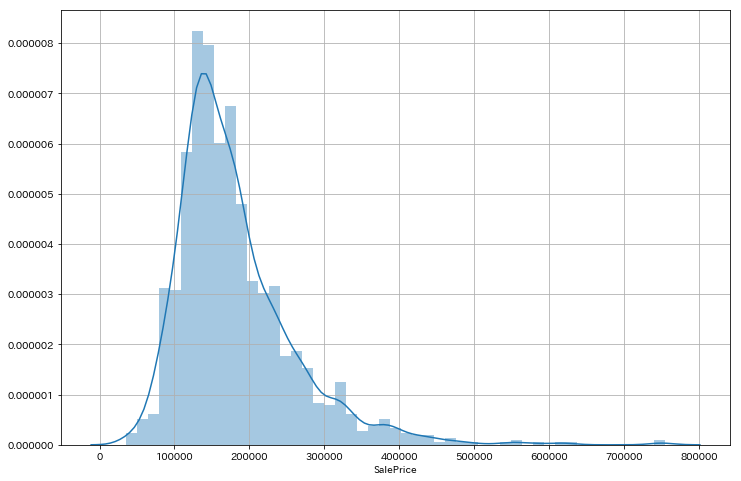

In [8]:
# plot hist
fig = plt.figure(figsize=(12, 8))

plt.grid()

sns.distplot(df_anls['SalePrice'])

### 2) Pipeline of regression

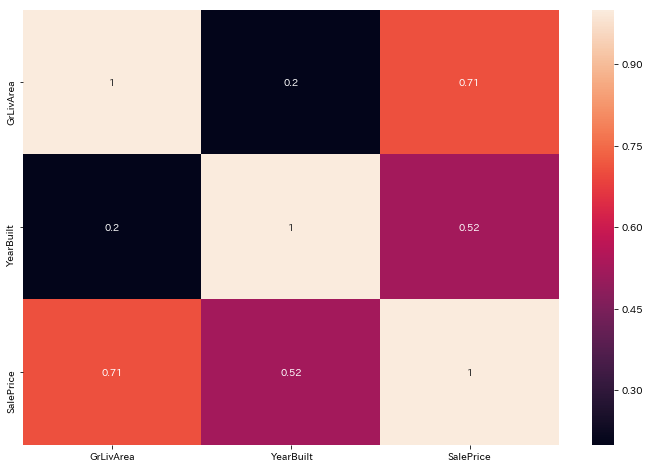

In [9]:
fig = plt.figure(figsize=(12, 8))

correlation_matrix = np.corrcoef(df_anls.transpose())

sns.heatmap(correlation_matrix, annot=True,
            xticklabels=columns_train,
            yticklabels=columns_train)

plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# define X and y
X = df_anls.iloc[:, :2]
y = df_anls['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [11]:
from sklearn.preprocessing import StandardScaler
# standalized
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Logarithmic
y_train_log = np.log(y_train)
y_test_log =np.log(y_test)

In [12]:
# import for LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression

In [13]:
model_LR = LinearRegression()
reg = model_LR.fit(X_train_std, y_train_log)
y_pred_log = model_LR.predict(X_test_std)

# R**2
reg.score(X_train_std, y_train_log)

0.6942838723446799

In [14]:
reg.coef_

array([0.24600541, 0.18635515])

In [15]:
reg.intercept_ 

12.035571511437952

In [16]:
# Inverse logarithmic conversion
y_pred = np.exp(y_pred_log)

# Mean Squared Error, MSE
from sklearn.metrics import mean_squared_error

score_LR = mean_squared_error(y_test, y_pred)
print('MSE: {:,}'.format(score_LR))

from math import sqrt
score_R_LR = sqrt(score_LR)

print('RMSE: {:,}'.format(score_R_LR))

MSE: 1,615,695,508.8223348
RMSE: 40,195.71505549236


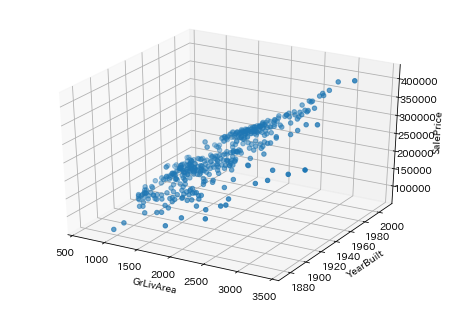

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# intialize
fig = plt.figure()
ax = Axes3D(fig)

# generate axis
ax.set_xlabel("GrLivArea" )
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

# change type of data
x1 = X_test.loc[:, "GrLivArea"]
x2 = X_test.loc[:, "YearBuilt"]

# vidualization
ax.scatter3D(x1, x2, y_pred)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


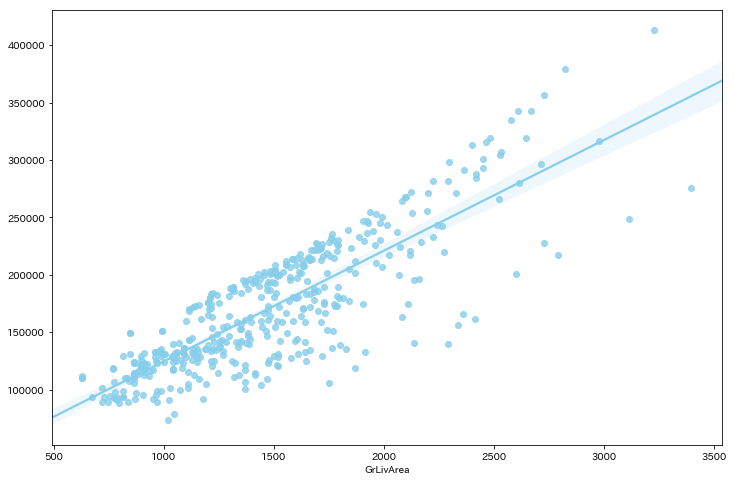

In [18]:
# vidualize "GrLivArea" --> "SalePrice"
fig = plt.figure(figsize=(12, 8))
sns.regplot(x=x1, y=y_pred, color='skyblue')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


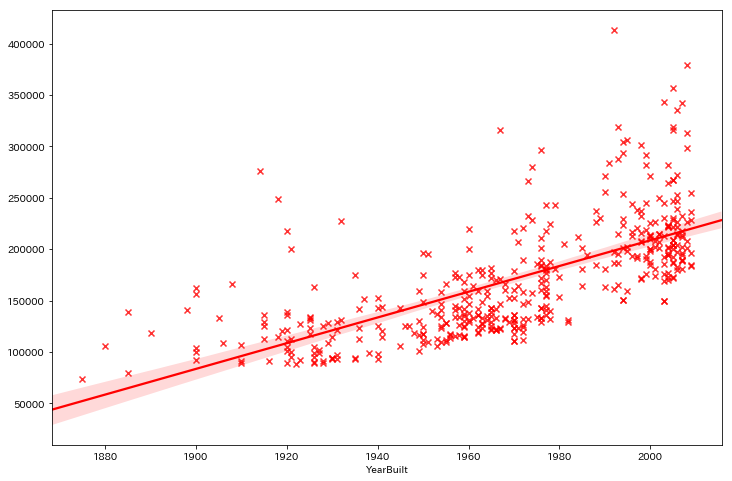

In [19]:
# vidualize ""YearBuilt" --> "SalePrice"
fig = plt.figure(figsize=(12, 8))
sns.regplot(x=x2, y=y_pred, color='red', marker='x')

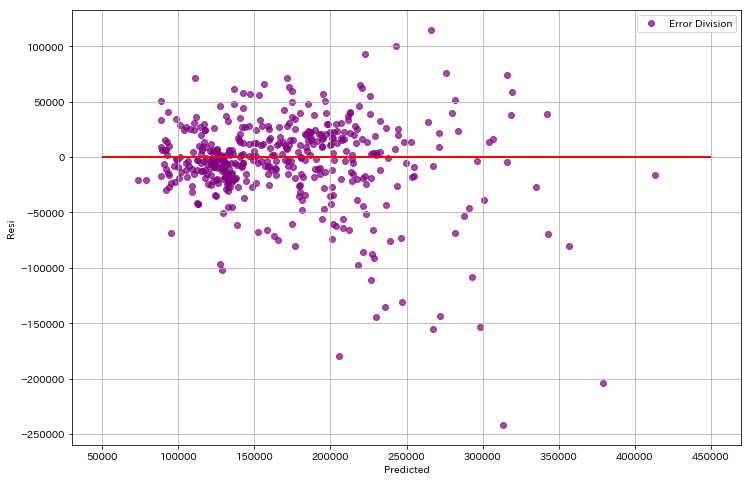

In [20]:
# Visualize a graph of error
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_pred - y_test, marker = 'o', c = 'purple', label = 'Error Division',
            alpha=0.7)
plt.xlabel('Predicted')
plt.ylabel('Resi')

plt.grid()

# Legend displayed on upper right
plt.legend(loc = 'upper right')

# Draw a straight: y = 0
plt.hlines(y = 0, color = 'red', xmin = 50000, xmax = 450000, lw = 2)

plt.show()

### 3) Compare methods

1.Linear Regression

In [21]:
# Mean Squared Error, MSE
from sklearn.metrics import mean_squared_error

df_train_error = mean_squared_error(y_test_log,y_pred_log)
print('MSE: {:,}'.format(df_train_error ))

from math import sqrt
df_train_error_r = sqrt(df_train_error)

print('RMSE: {:,}'.format(df_train_error_r ))

# Inverse logarithmic conversion
y_pred = np.exp(y_pred_log)

MSE: 0.04336038380764443
RMSE: 0.20823156294770598


2.SVC

In [22]:
import numpy as np
from sklearn.svm import SVR
# Regressor
model_SVR = SVR()
model_SVR.fit(X_train_std, y_train_log)

# Inverse logarithmic conversion
SVR_pred = np.exp(model_SVR.predict(X_test_std))

score_SVR = mean_squared_error(y_test, SVR_pred)

3.Dicidion tree

In [23]:
from sklearn.tree import DecisionTreeRegressor 
# Regressor
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train_std, y_train_log)

# Inverse logarithmic conversion
DTR_pred = np.exp(model_DTR.predict(X_test_std))
score_DTR = mean_squared_error(y_test, DTR_pred)

4.Ramdom Forrest

In [24]:
from sklearn.ensemble import RandomForestRegressor 
# Regressor
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train_std, y_train_log)

# Inverse logarithmic conversion
RFR_pred = np.exp(model_RFR.predict(X_test_std))
score_RFR = mean_squared_error(y_test, RFR_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


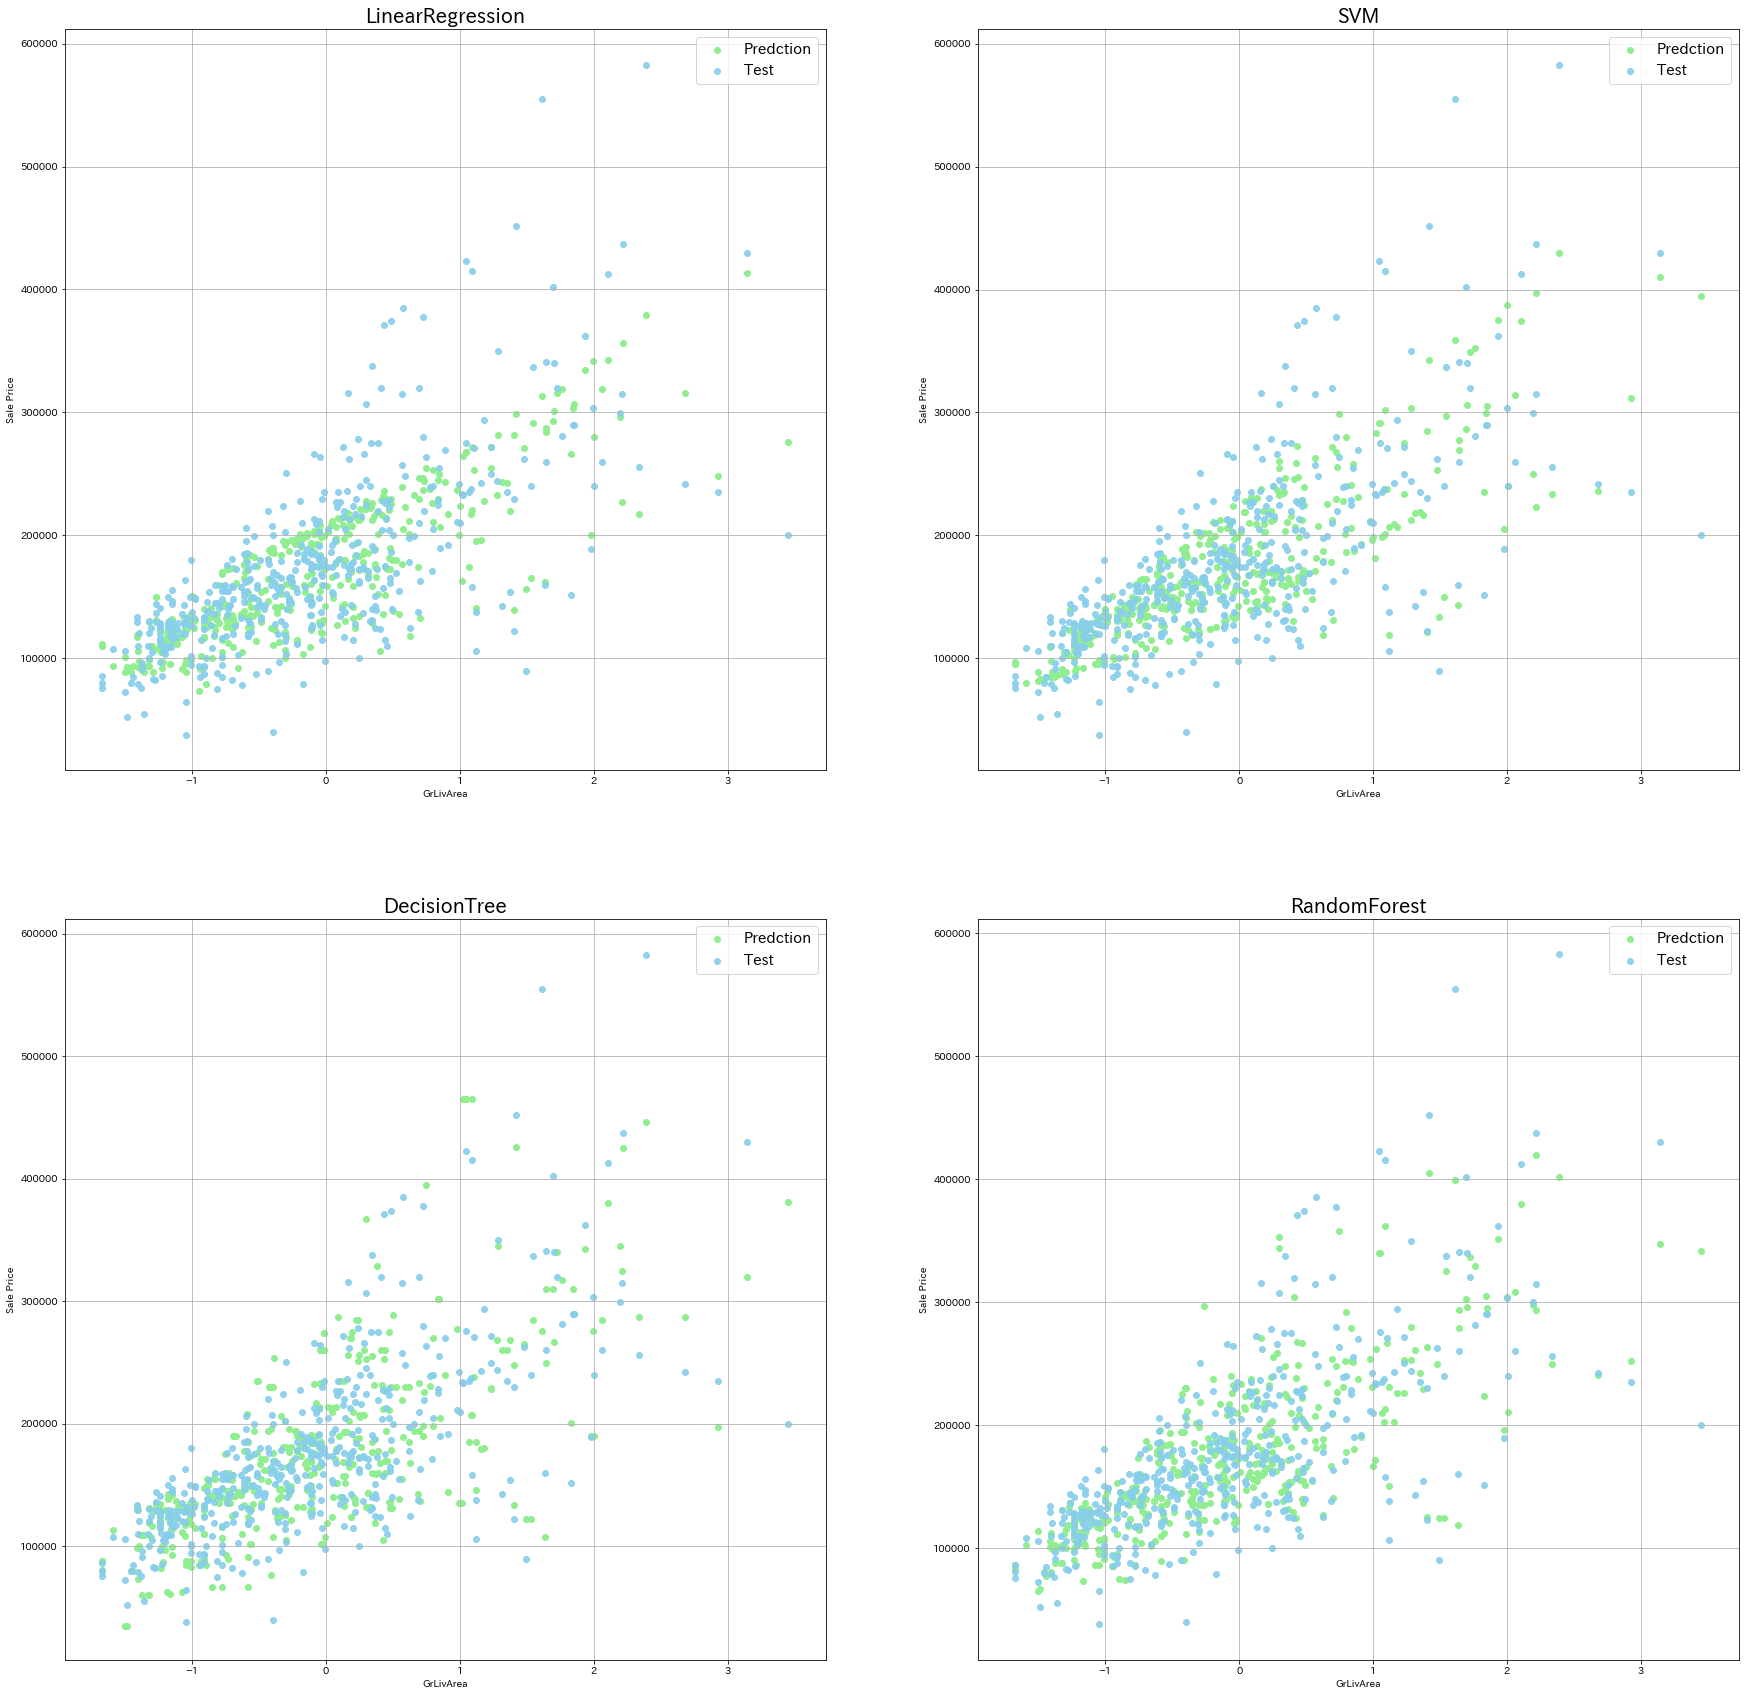

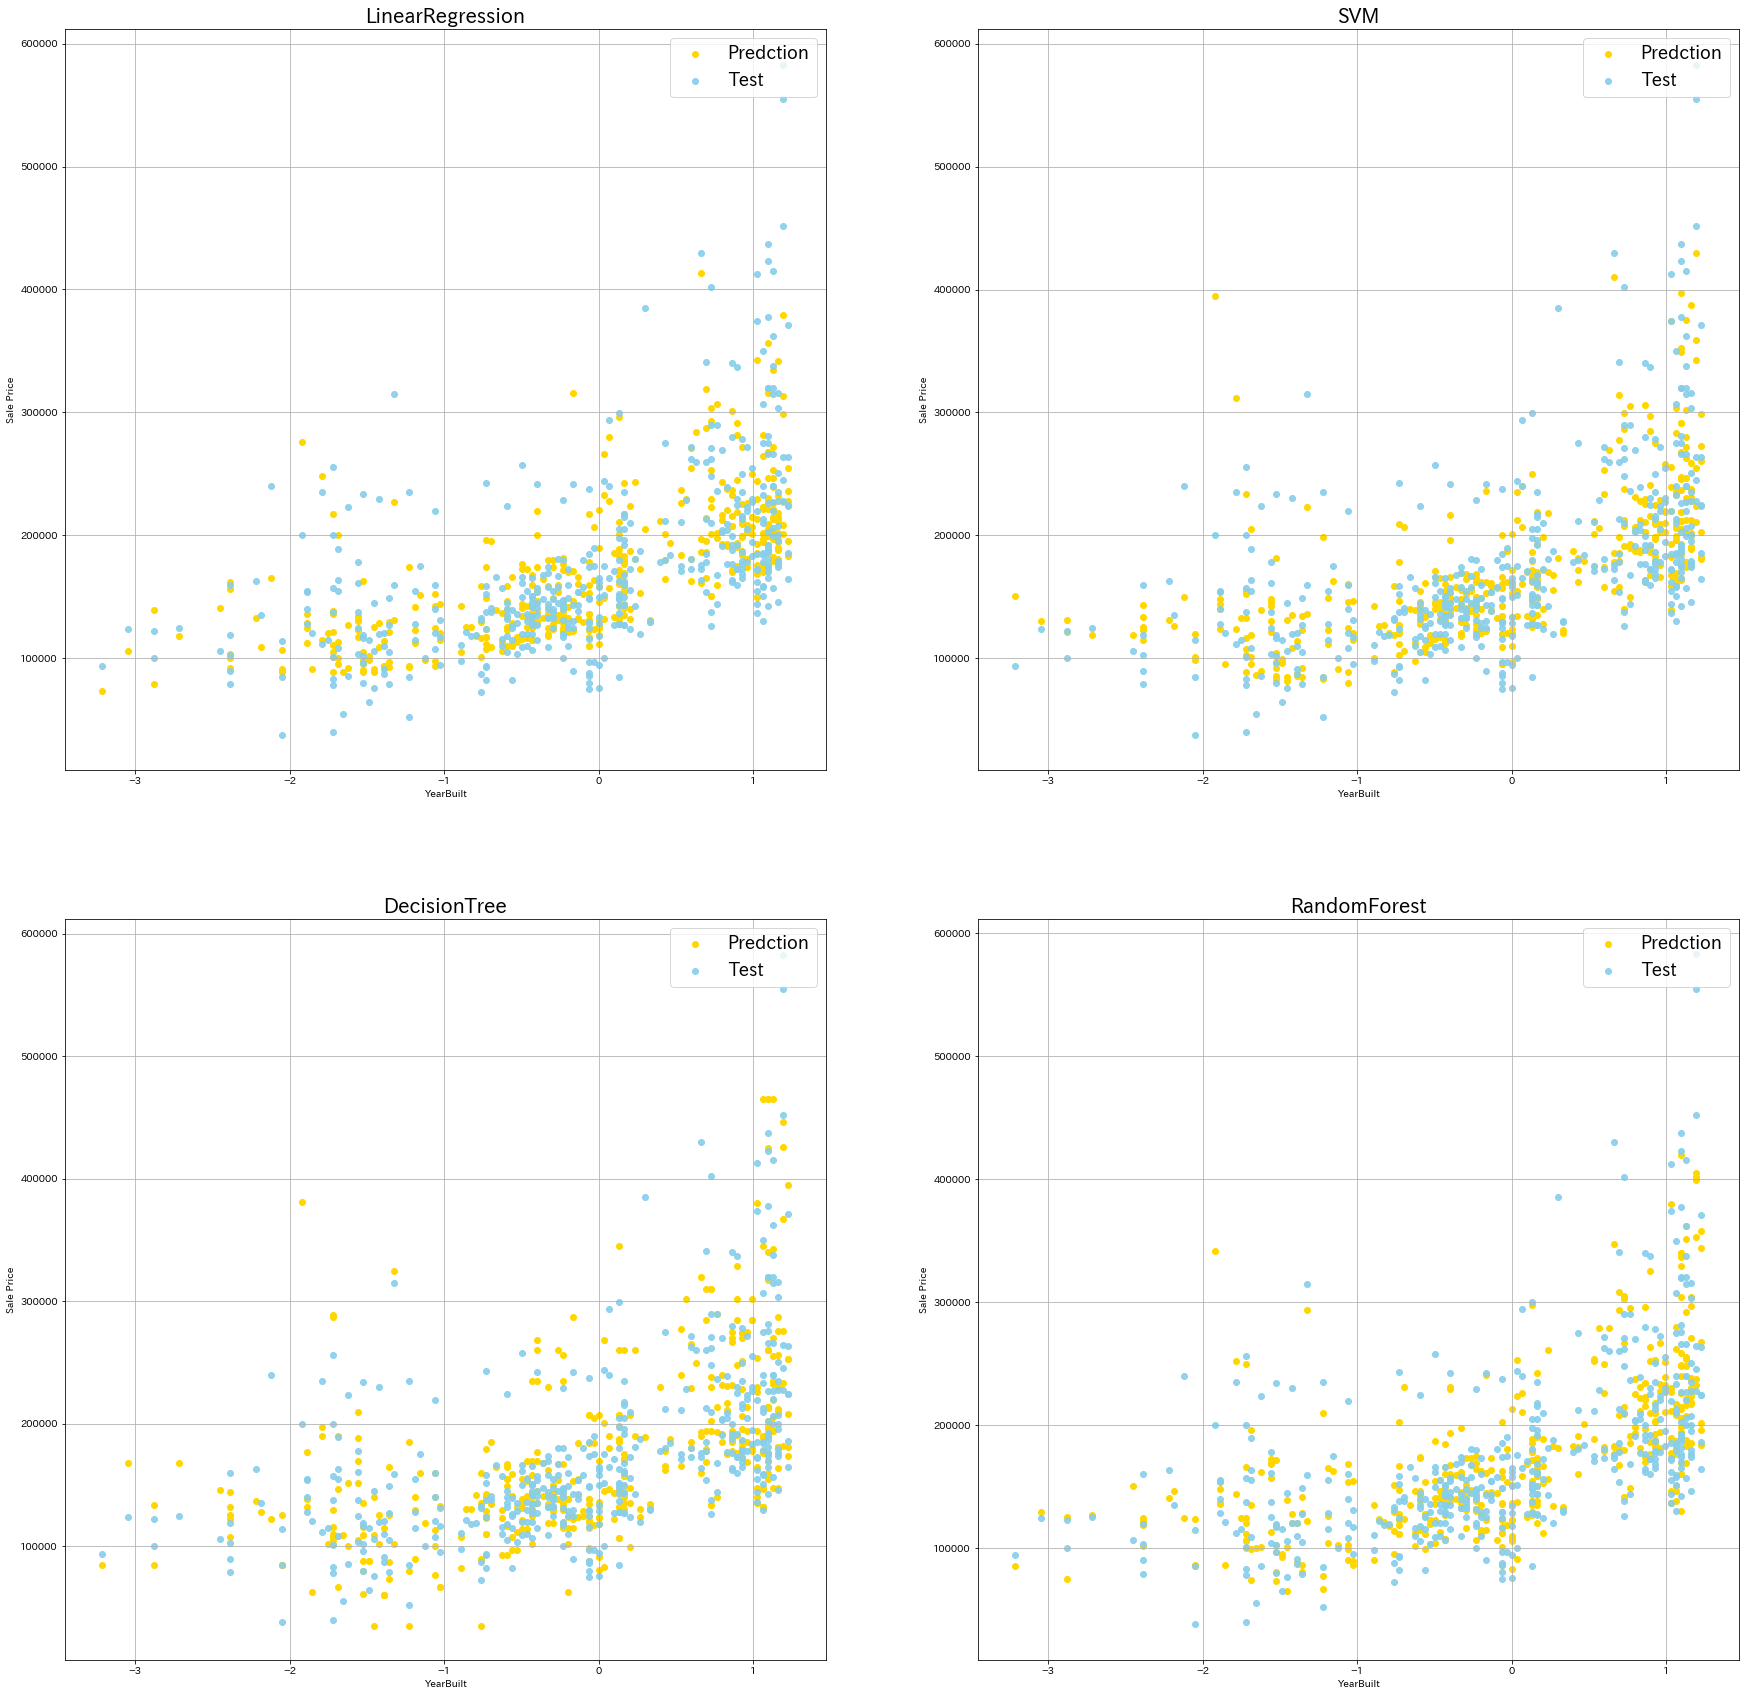

In [40]:
# plot simple scatter
method_title = ["LinearRegression","SVM","DecisionTree","RandomForest"]
y_pred_all = [y_pred, SVR_pred, DTR_pred, RFR_pred]

plt.figure(figsize=(30,30))
for num, y in enumerate(y_pred_all):
    # subplot
    plt.subplot(2,2,num+1)
    
    # plot
    plt.scatter(X_test_std[:,0], y, c="lightgreen", marker="o", label = 'Predction')
    plt.scatter(X_test_std[:,0], y_test, alpha=0.9, c="skyblue", marker="o", label = 'Test')
    plt.title(method_title[num], fontsize=20)
    plt.xlabel('GrLivArea')
    plt.ylabel('Sale Price')
    plt.grid()
    plt.legend(loc='upper right',fontsize=15)
    

plt.figure(figsize=(30,30))
for num, y in enumerate(y_pred_all):
    # subplot
    plt.subplot(2,2,num+1)
    # plot
    plt.scatter(X_test_std[:,1], y, c="gold", marker="o", label = 'Predction')
    plt.scatter(X_test_std[:,1], y_test, alpha=0.9, c="skyblue", marker="o", label = 'Test')
    plt.title(method_title[num], fontsize=20)
    plt.xlabel('YearBuilt')
    plt.ylabel('Sale Price')
    plt.grid()
    plt.legend(loc='upper right',fontsize=18)
    

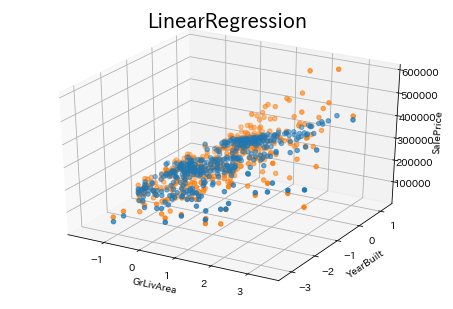

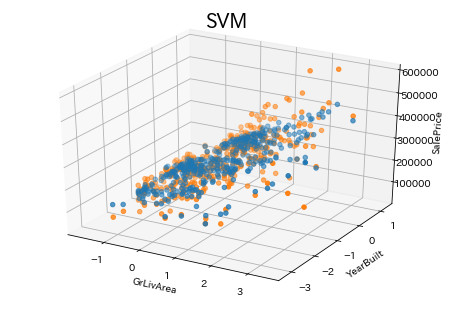

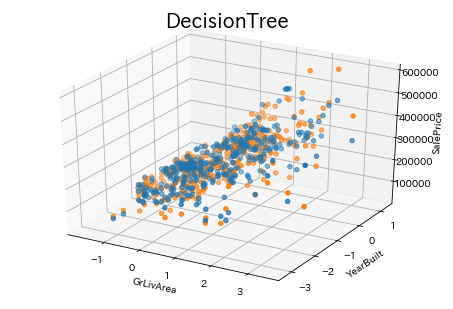

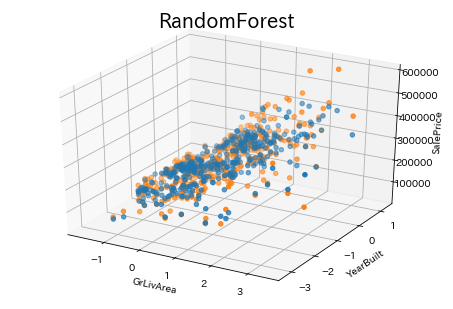

In [58]:
# plot simple scatter
method_title = ["LinearRegression","SVM","DecisionTree","RandomForest"]
y_pred_all = [y_pred, SVR_pred, DTR_pred, RFR_pred]

for num, y in enumerate(y_pred_all):
    
    # intialize
    fig = plt.figure()
    ax = Axes3D(fig)

    # generate axis
    ax.set_xlabel("GrLivArea" )
    ax.set_ylabel("YearBuilt")
    ax.set_zlabel("SalePrice")
    
    # plot
    ax.scatter3D(X_test_std[:,0], X_test_std[:,1], y)
    ax.scatter3D(X_test_std[:,0], X_test_std[:,1], y_test)
    plt.title(method_title[num], fontsize=20)
    
    plt.show()

In [26]:
# score of MSE
score_all = [score_LR, score_SVR, score_DTR, score_RFR]

# table of MSE
pd_score_all = pd.DataFrame(score_all, columns=["MSE"], index=method_title)
pd_score_all.sort_values(by=['MSE'])

,MSE
SVM,1.463102e+09
RandomForest,1.600504e+09
LinearRegression,1.615696e+09
DecisionTree,2.613070e+09


Support Vector Machine is the best MSE score in four method. Especially, scatter of GrLivArea & predict  fit  better than YearBuilt. Desion Tree is worse than Random Forest. This is because Random Forest is an aggregate of Desion Tree.

### 4) Advance task/ Meaning of each parameter